### Import libraries

In [1]:
%load_ext nb_black
%matplotlib inline

import anndata as a
import vintools as v
import scdiffeq as sdq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from scatter import _ScatterPlot_Module as Scatter

<IPython.core.display.Javascript object>

### Load some data

Code to prepare downsampled data:

```python
adata = anndata.read_h5ad("../data/AnnData_train.WeinrebBenchmark.2020.h5ad")
adata.obsm['X_SPRING'] = adata.obs[['SPRING-x', 'SPRING-y']].values
adata = adata[::20]
adata.write_h5ad("../AnnData.Weinreb.2020.DownSample.h5ad")
```

In [2]:
adata = a.read_h5ad("./LARRY_benchmark/AnnData.Weinreb.2020.DownSample.h5ad")
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 1352 × 25289
    obs: 'LK_LSK', 'time', 'Library', 'Cell barcode', 'time_point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clonal_lineage', 'cytotrace', 'cytotrace_rank', 'cytotrace_GCS', 'lineage_tracing', 'gene_count', 'potency', 'n_counts', 'Source', 'mito_frac', 'time_info', 'state_info', 'cell_group_A', 'cell_group_B', 'traj_Neutrophil', 'traj_Monocyte', 'trajectory'
    var: 'gene_ids'
    uns: 'BM_ff', 'BMq', 'DE_Genes', 'DE_Genes_indices', 'E2', 'E2_mpp', 'LSKcells_d2', 'TF_indices', 'TFs', 'Y', 'd2_df', 'd2_idx', 'fate_names', 'filtered_gene_indices', 'mpp_ff', 'random_gene_indices', 'test', 'threepoint_lineages', 'train'
    obsm: 'X_SPRING'

<IPython.core.display.Javascript object>

### Start building the plot space

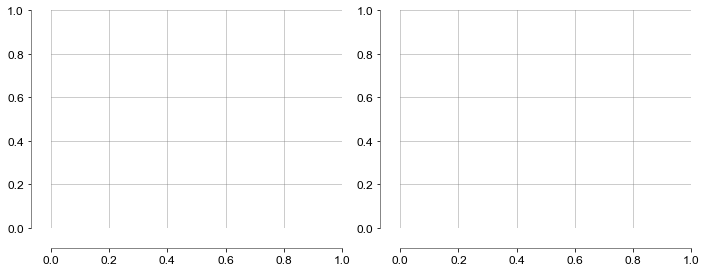

<IPython.core.display.Javascript object>

In [3]:
scatter = v.pl.ScatterPlot()
scatter.construct_layout(nplots=2)
scatter.style()

So our plot space is laid out. We made space for five different subplots. What can we put here?

To simplify, we have **two main scenarios** we can consider:

**Scenario 1**: **`[x, y]`** points colored by a continuous variable (i.e., a vector of floats such as the expression value of a gene or contnuous time. 

**Scenario 2**: **`[x, y]`** points colored by a categorical value such as an embedding colored by cluster assignment.

For objects in AnnData, we want this to be automatically detected. 

For each subplot, we'll just provide an ordered list of assignments. If assignments are not provided where there are spaces, plots colored in lightgrey will be populated. 

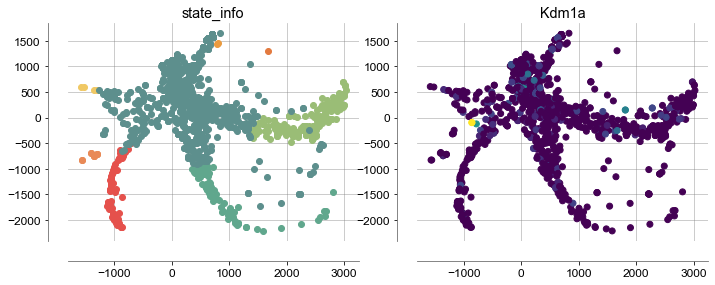

<IPython.core.display.Javascript object>

In [4]:
adata.var_names = adata.var.gene_ids
scatter.plot_data(
    adata, embedding="X_SPRING", variables_to_plot=["state_info", "Kdm1a"]
)
scatter.fig

Of course, we don't want to build such a plot, step-by-step every time. It's nice to have one single, in-line command such as:

```python
v.pl.scatter(adata, 'variable')
```

This is inuitive and satisfies the whole point of having presets: ease. This function would look something like the following, essentially wrapping the class we've created to make plots step-by-step and streamlining the notebook plotting process:

```python

def _scatter(adata, embedding, variables_to_plot):

    """"""

    sc = Scatter.Scatter()
    sc.construct_layout(nplots=len(variables_to_plot))
    sc.style()
    sc.plot_data(adata, embedding="X_SPRING", variables_to_plot=["state_info", "Kdm1a"])
    plt.show()
    
```

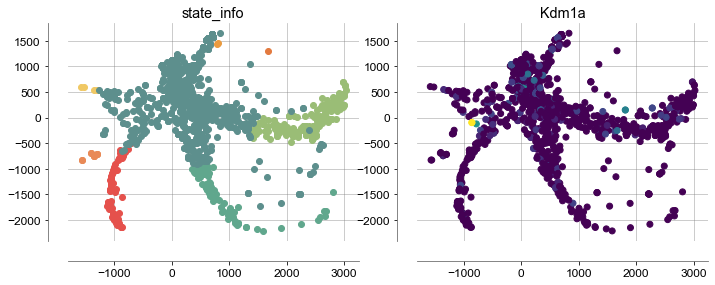

<IPython.core.display.Javascript object>

In [5]:
v.pl.scatter(adata, embedding="X_SPRING", variables_to_plot=["state_info", "Kdm1a"])

### Functionality to add:
- colorschemes
- outlines
- non-AnnData x and y parameterization for very simple plots